### Exploratory Data Analysis (EDA)
Now that I've cleaned the data, let's do some analysis to address our original question: "What are the characteristics of the customers who register for the term deposit account?"

I will divide our data into categorical and numeric and proceed in this way.

EDA combines parts of statistics, data visualization, and subject matter knkowledge. There is no 'right' way to perform EDA. The goal is to build basic intuition of the dataset, and answer questions regarding trends found in the data. 



### Step 1:  Feature Analysis 

A good starting stage is to examine our features one by one. By doing so I can get an idea about the shape of the distributions for each feature.


### Dataset

I will use a real world bank marketing dataset. The dataset contains information about customers who were contacted as part of a telephone marketing campaign trying to get customers to sign up for a term deposit product. The dataset also contains information about whether the customer has been contacted as part of the current marketing campaign or had been as part of a previous campaign. 

#### Data Dictionary

Data dictionary to give us better understaning the dataset:   
### Demographic Data for Client:
- age (numeric)
- job (categorical)
- marital: marital status (categorical, note: 'divorced' means divorced or widowed)
- education:Education Level (categorical)
### Banking Data for client
- default: Failed to make a payment? (categorical)
- balance: average yearly balance ( numerical)
- housing: Own vs Rent (Do they have a housing loan)? (categorical)
- loan: Do they have a loan with bank or not? (categorical)
### Field of Interest for client
Data about the calls from *this* campaign:
- contact: contact communication type ,Contact Method, last contact (categorical)
- month: last contact month of year, Last Date of contact with client (Month) (categorical)
- day: last contact day of the week, Last Date of contact with client (day) (categorical)
- duration: last contact duration, last contact duration in seconds (numeric)
- campaign:  number of contacts performed during this campaign and for this client (includes last contact) (numeric)
Data about calls from *previous* campaigns:
- previous:  number of contacts performed before this campaign and for this client. 0 means this client was not contacted in previous campaign(numeric)
- poutcome: outcome of the previous marketing campaign, previous campaign outcome (categorical) 
- Pday:  number of days that passed by after the client was last contacted from a previous campaign(-1 means client was not previously contacted)(categorical)
- y:  Client opened a Deposit Account(categorical)

Field of interest:(Hypothesis):
-     has the client opended Deposit account?

- y:  Client opened a Deposit Account(categorical)
- y:  Target : 'Deposit'  and 'No-Deposit'
  
### Question of interest


> How do customers who target for the term deposit product differ from those who did not? This can be in terms of customer demographics or in terms of features of the current and prior marketing campaign. 

#### Business Objectives 
##### 1- Cost Reduction:
Telemarketing Cost: Bank pays internal employees or 3rd party call centers to conduct the marketing calls, therefore it is essential to target customer with higher chance of opening deposit
Reducing the number of calls made to uninterested or unsuitable prospects
Minimizing the number of unproductive calls helps in reducing wastage of human and financial resources.
##### 2- Increased Conversion Rates | Increase ROI (Return On Investment)
##### 3- Enhanced Customer Experience (CX):
Increase customer satisfaction rate (CSAT) 
Customers more likely to respond positively to calls that address their needs and interests
##### 4- Strategic Alignment
Market Positioning

### Enhance The Efficiency and Effectiveness of Telemarketing Campaigns 

##### 1- Develop a predictive model using historical data.
##### 2- Identify key factors that influence customer decisions.
##### 3- Provide actionable insights to marketing and sales teams.



In [804]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [805]:
data = pd.read_csv('banking target.csv') # read dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [806]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


rename the 'y' column to 'taget' for better understanding in the feature.

In [808]:
data = data.rename(columns={'y' : 'target'})
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target'],
      dtype='object')

In [809]:
# Categorical columns 
cat_cols = data.dtypes[data.dtypes.values=='object'].index.tolist()

cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'target']

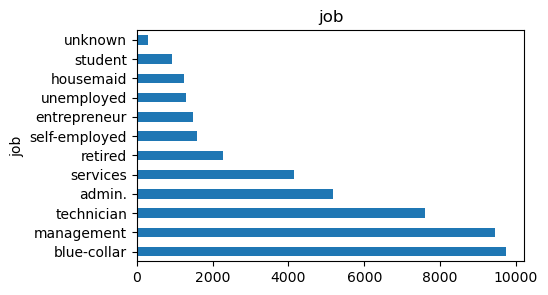

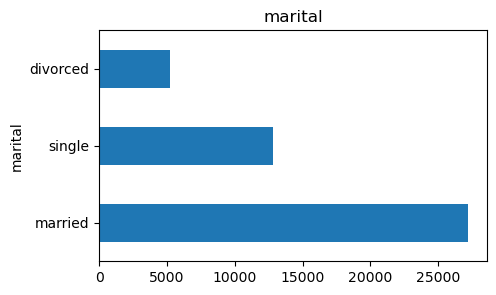

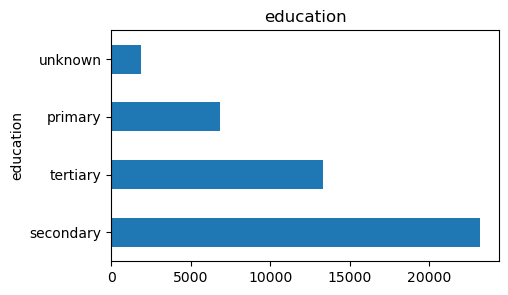

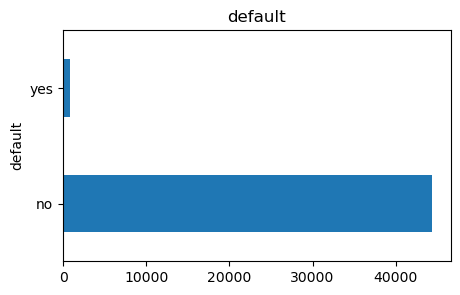

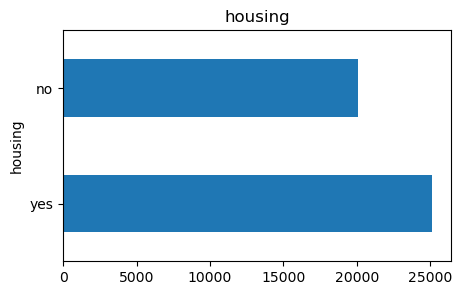

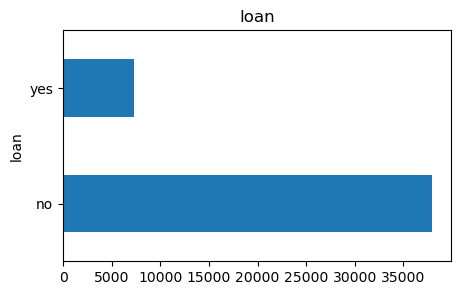

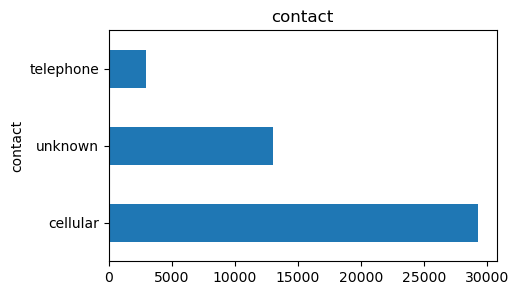

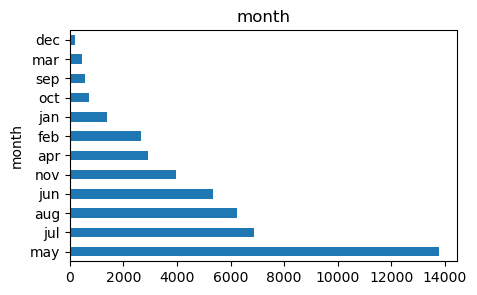

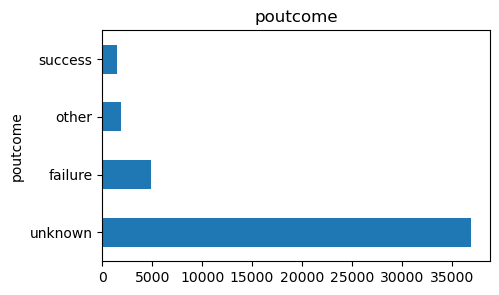

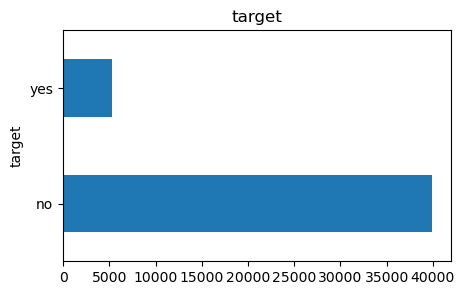

In [810]:
# Plot bar-charts for the categorical columns

for col in cat_cols:
    plt.figure(figsize=(5, 3))
    data[col].value_counts().plot(kind='barh')
    plt.title(f'{col}')
    plt.show()

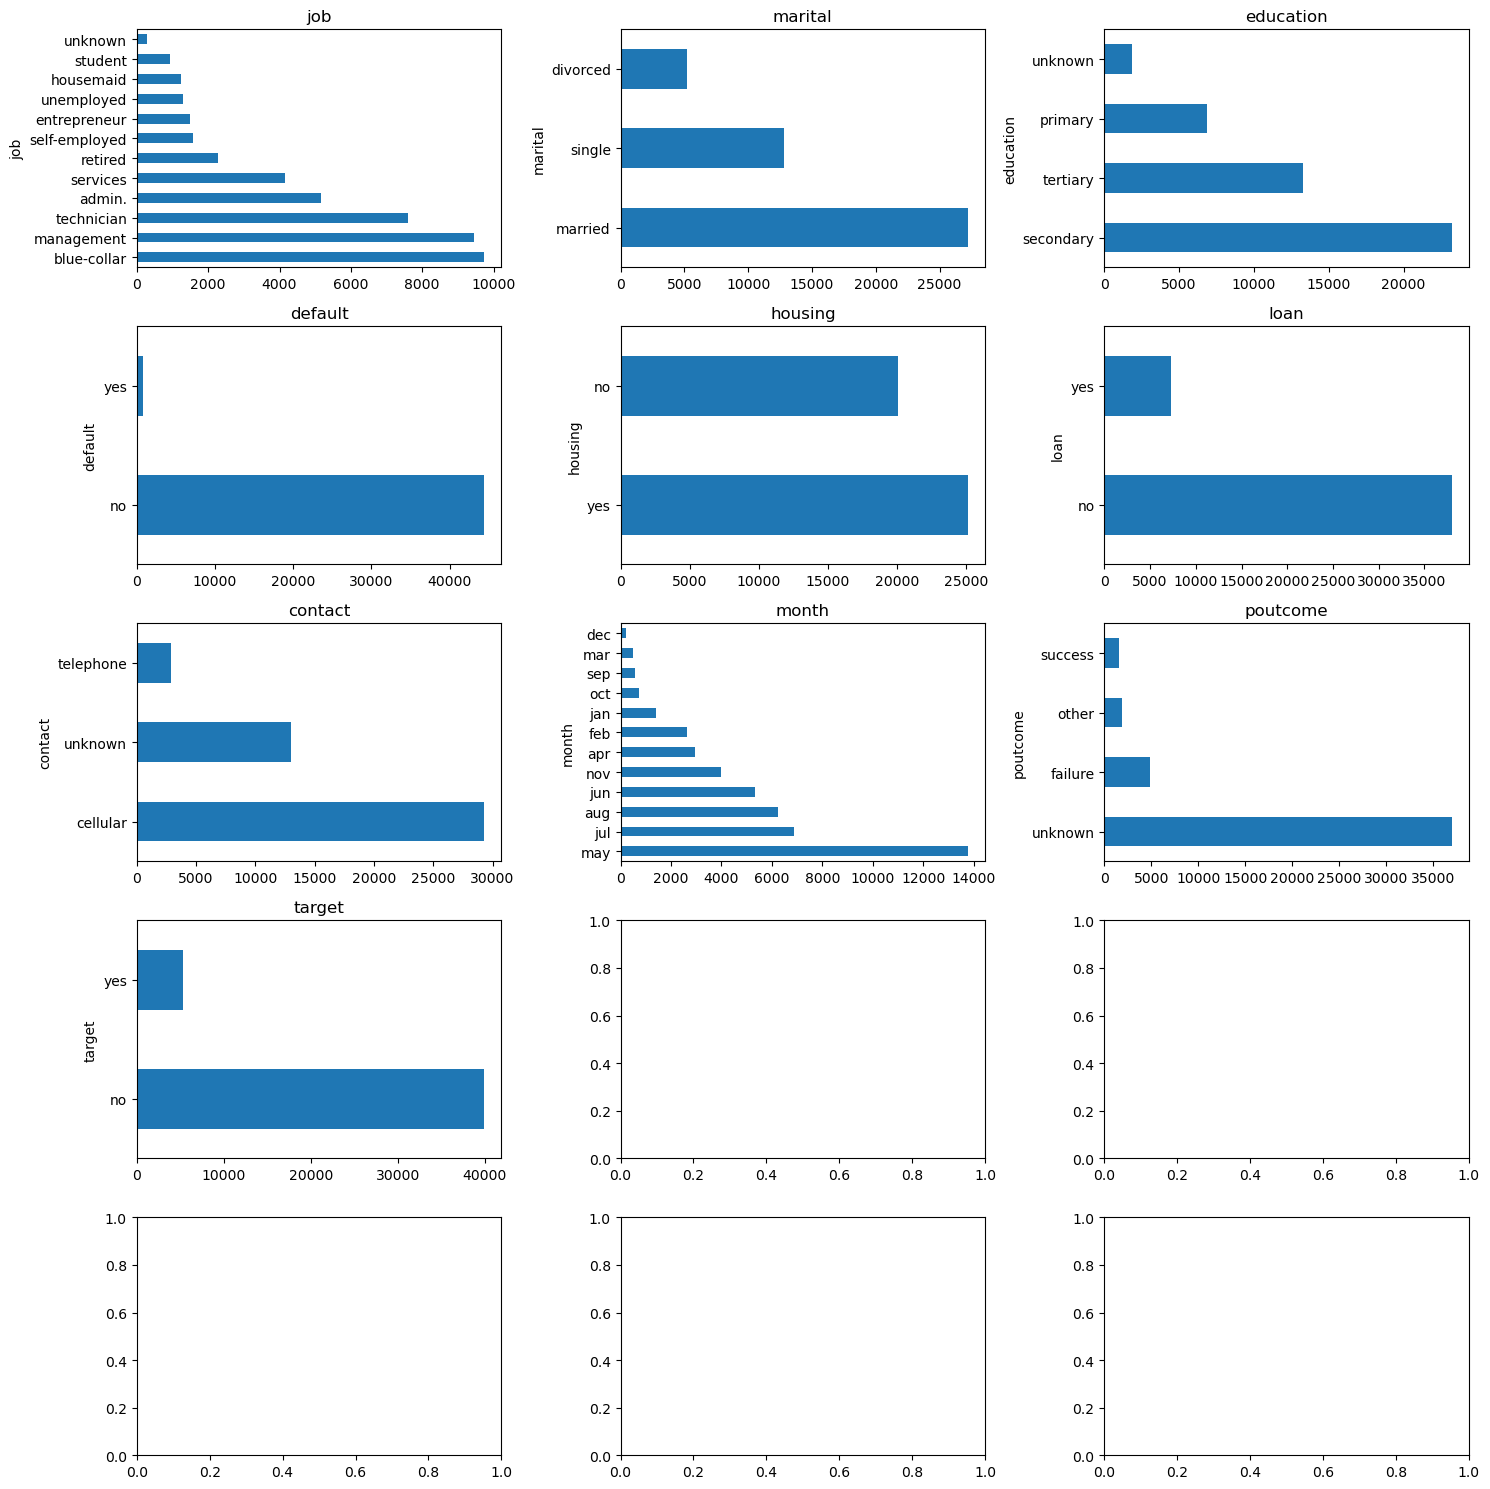

In [811]:
### Using subplots

plt.subplots(5, 3, figsize=(15, 15))

for i,col in enumerate(cat_cols):
    plt.subplot(5,3, i+1) # i is used as the index for the grid 

    # Leveraging pandas plotting with plt syntax
    data[col].value_counts().plot(kind='barh')
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

"Visualization in EDA:
I'll be using the matplotlib and seaborn libraries for the visualization aspect of Exploratory Data Analysis (EDA).
Managing Warnings:
To prevent certain warnings that might arise during plotting and impact the results, I'll use the warnings library. I'll apply the .filterwarnings method to handle these warnings."

###  Have same steps for numeric columns.

In [815]:
num_cols = data.dtypes[data.dtypes.values != 'object'].index.tolist()
len(num_cols)

7

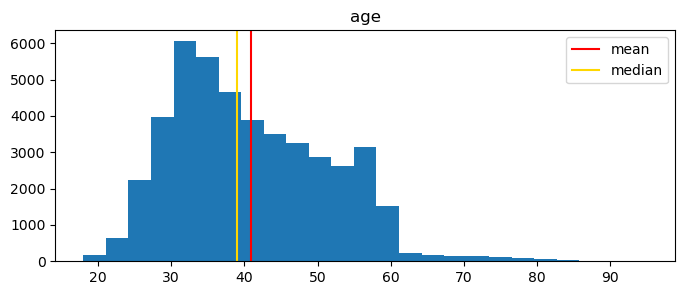

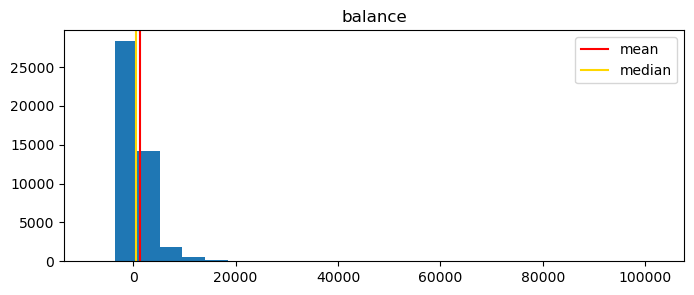

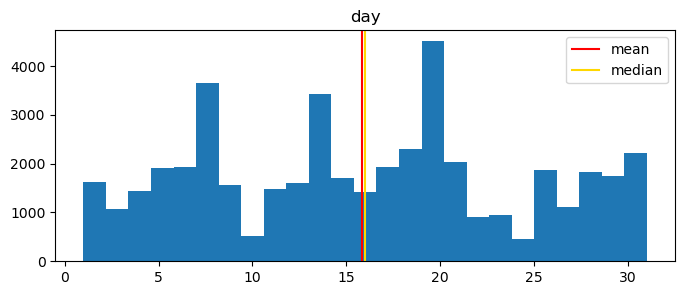

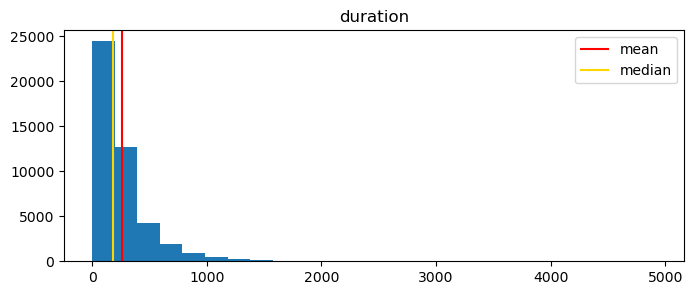

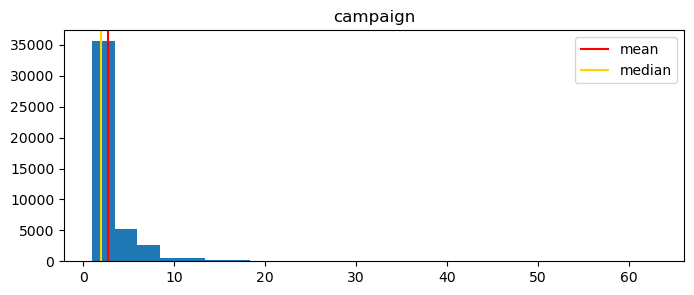

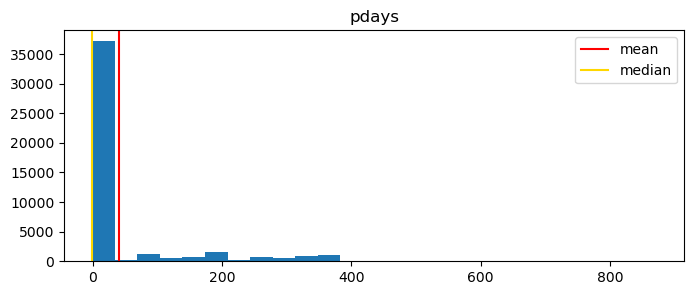

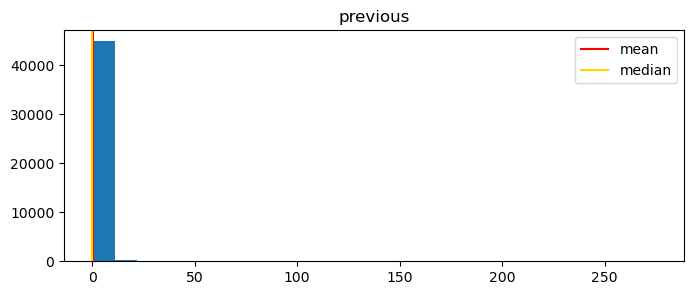

In [816]:
for col in num_cols:
    plt.figure(figsize=(8, 3))

    plt.hist(data[col], bins=25)
    plt.title(f'{col}')
    plt.axvline(data[col].mean(), c='red', label='mean')
    plt.axvline(data[col].median(), c='gold', label='median')
    plt.legend()

    plt.show()

In [817]:
num_cols = data.dtypes[data.dtypes.values != 'object'].index.tolist()
len(num_cols)

7

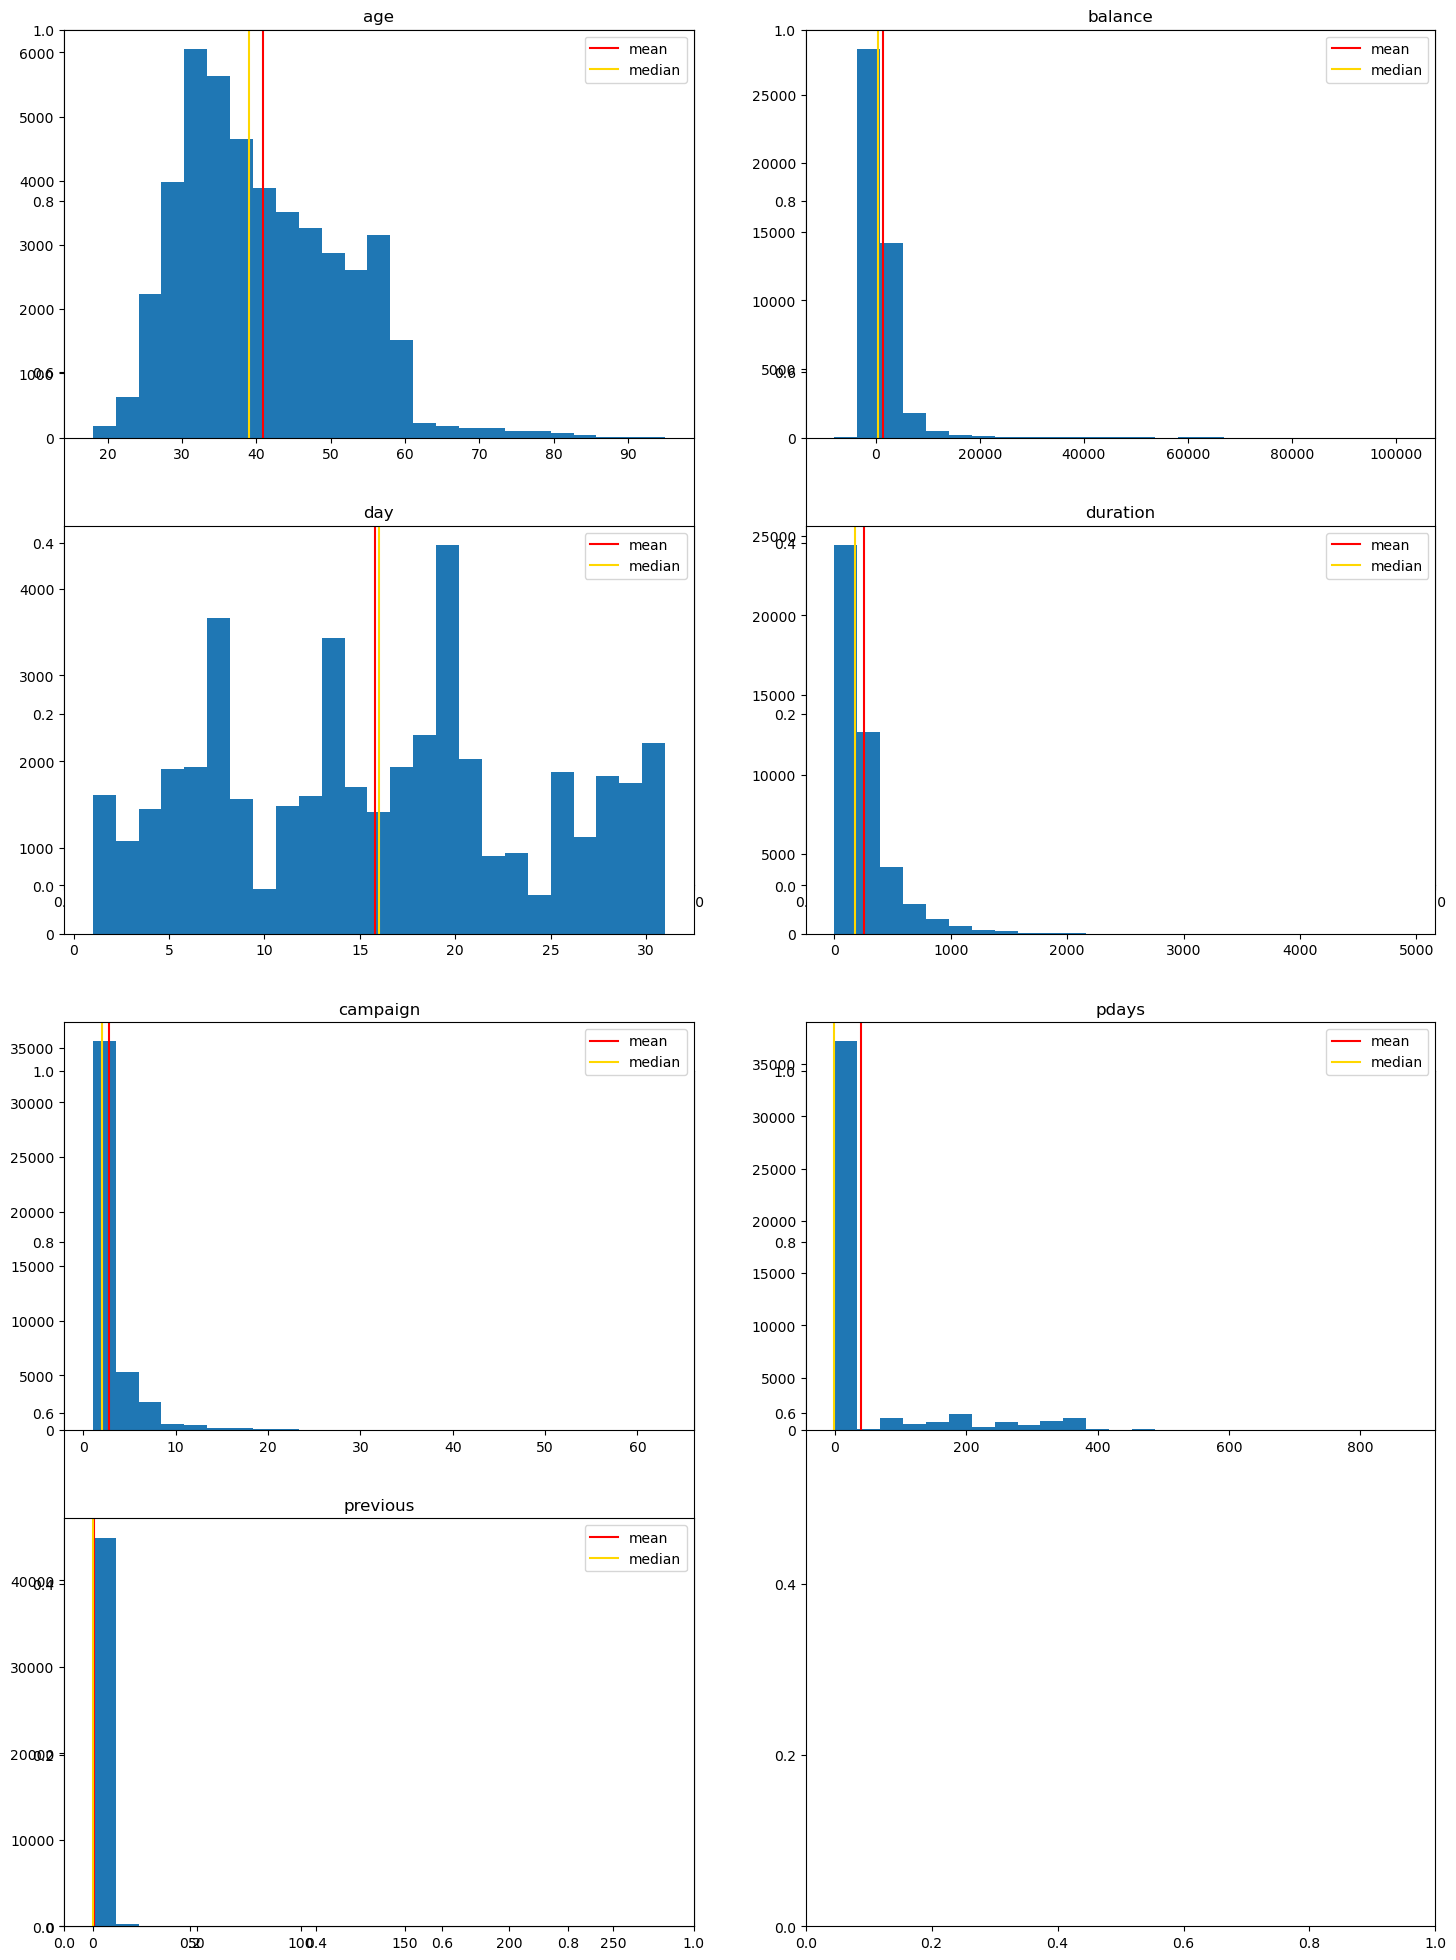

In [818]:
plt.subplots(2, 2, figsize=(15, 20)) # Adjusted the grid size to 4x2 for 7 columns

for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i + 1) # i is used as the index for the grid 
                             # Adjusted to fit within a 4x2 grid
    plt.hist(data[col], bins=25)
    plt.title(f'{col}')
    plt.axvline(data[col].mean(), c='red', label='mean')
    plt.axvline(data[col].median(), c='gold', label='median')
    plt.legend()

plt.tight_layout()
plt.show();

Our plots indicate that the majority of customers in the data are under 60 years old, with an average age of around 40 and a median age of approximately 37-38 years. Younger customers often exhibit different purchasing behaviors compared to older ones. How might this influence product registration patterns?

### Multivariate EDA 

Multivariate EDA is the process of looking at multiple variables together. This is a very useful form of visualization as we can begin to learn how different variables interact with each other. 

In [821]:
numerical_features = []
categorical_features = []

for column in list(data.columns):
    if data[column].dtypes == 'O':
        categorical_features.append(column)
    else:
        numerical_features.append(column)

print("Numerical Features:")
print(numerical_features)
print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Categorical Features:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'target']


 ##### Categorical data
For our categorical columns, we will make the 100% unstacked bar graph. This graph will show the proportion of customers in each category level who 'deposit' for the product against 'no-deposit' customers. 

In [823]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [824]:
# heere as you see target column datatype is dictionary and has key and value, i changed th evalues to 'deposit' and 'no-deposit'
data['target'] = data['target'].replace({'yes': 'deposit', 'no': 'no-deposit'})

In [825]:
# To make this easy we are going to encode deposit/no-deposit to is 'target_' as 1, 0 otherwise

data['target_'] = np.where(data['target'] == 'deposit', 1, 0)

In [826]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,target_
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no-deposit,0


In [827]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,target_
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no-deposit,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no-deposit,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no-deposit,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no-deposit,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no-deposit,0


In [828]:
# We can groupby the job and target column
data.groupby(['job', 'target_']).count()

age  marital  education  default  balance  housing  \
job           target_                                                        
admin.        0        4540     4540       4540     4540     4540     4540   
              1         631      631        631      631      631      631   
blue-collar   0        9024     9024       9024     9024     9024     9024   
              1         708      708        708      708      708      708   
entrepreneur  0        1364     1364       1364     1364     1364     1364   
              1         123      123        123      123      123      123   
housemaid     0        1131     1131       1131     1131     1131     1131   
              1         109      109        109      109      109      109   
management    0        8157     8157       8157     8157     8157     8157   
              1        1301     1301       1301     1301     1301     1301   
retired       0        1748     1748       1748     1748     1748     1748   
              1         516      516        516      516      516      516   
self-employed 0        1392     1392       1392     1392     1392     1392   
              1         187      187        187      187      187      187   
services      0        3785     3785       3785     3785     3785     3785   
              1         369      369        369      369      369      369   
student       0         669      669        669      669      669      669   
              1         269      269        269      269      269      269   
technician    0        6757     6757       6757     6757     6757     6757   
              1         840      840        840      840      840      840   
unemployed    0        1101     1101       1101     1101     1101     1101   
              1         202      202        202      202      202      202   
unknown       0         254      254        254      254      254      254   
              1          34       34         34       34       34       34   

                       loan  contact   day  month  duration  campaign  pdays  \
job           target_                                                          
admin.        0        4540     4540  4540   4540      4540      4540   4540   
              1         631      631   631    631       631       631    631   
blue-collar   0        9024     9024  9024   9024      9024      9024   9024   
              1         708      708   708    708       708       708    708   
entrepreneur  0        1364     1364  1364   1364      1364      1364   1364   
              1         123      123   123    123       123       123    123   
housemaid     0        1131     1131  1131   1131      1131      1131   1131   
              1         109      109   109    109       109       109    109   
management    0        8157     8157  8157   8157      8157      8157   8157   
              1        1301     1301  1301   1301      1301      1301   1301   
retired       0        1748     1748  1748   1748      1748      1748   1748   
              1         516      516   516    516       516       516    516   
self-employed 0        1392     1392  1392   1392      1392      1392   1392   
              1         187      187   187    187       187       187    187   
services      0        3785     3785  3785   3785      3785      3785   3785   
              1         369      369   369    369       369       369    369   
student       0         669      669   669    669       669       669    669   
              1         269      269   269    269       269       269    269   
technician    0        6757     6757  6757   6757      6757      6757   6757   
              1         840      840   840    840       840       840    840   
unemployed    0        1101     1101  1101   1101      1101      1101   1101   
              1         202      202   202    202       202       202    202   
unknown       0         254      254   254    254       254       254    25

In [829]:
# Because we have no nulls in this dataset you can see that the values are the the same accross columns so we can just select individual col to return 

data.groupby(['job', 'target_'])['age'].count().head()

job           target_
admin.        0          4540
              1           631
blue-collar   0          9024
              1           708
entrepreneur  0          1364
Name: age, dtype: int64

In [830]:
pct_data = (data.groupby(['job', 'target_'])['age'].count()/data.groupby('job')['age'].count())

In [831]:
pct_data.head(6)

job           target_
admin.        0          0.877973
              1          0.122027
blue-collar   0          0.927250
              1          0.072750
entrepreneur  0          0.917283
              1          0.082717
Name: age, dtype: float64

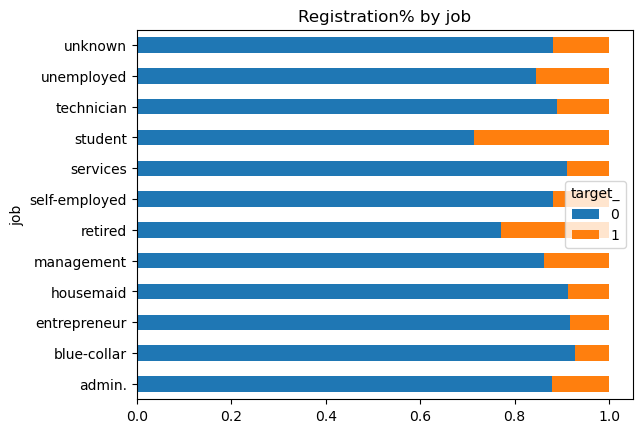

In [832]:
pct_data.unstack().plot.barh(stacked=True)
plt.title('Registration% by job')
plt.show()

Let's put this in a for loop to generate graphs for each categoricla column. 

In [834]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'target']

In [835]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,target_
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no-deposit,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no-deposit,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no-deposit,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no-deposit,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no-deposit,0


In [836]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'target']

Points of interest:

* Job: Students and retirees were most likely to sign up than most occupations. On the other side of that, those under 'blue collar', 'entrepreneur', 'services'... were less likely to sign up.

* Education: It seems like those who have a university degree also responded to our campaign efforts.

* Last contact month: It seems that the customer contacted in the fall and spring months respondd really well to our campaign efforts.



### Numerical data

We should look at the difference between the target and non-target groups in terms of our numerical cols.

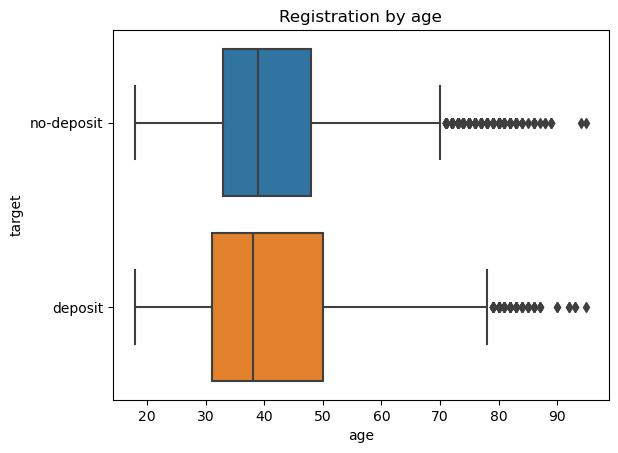

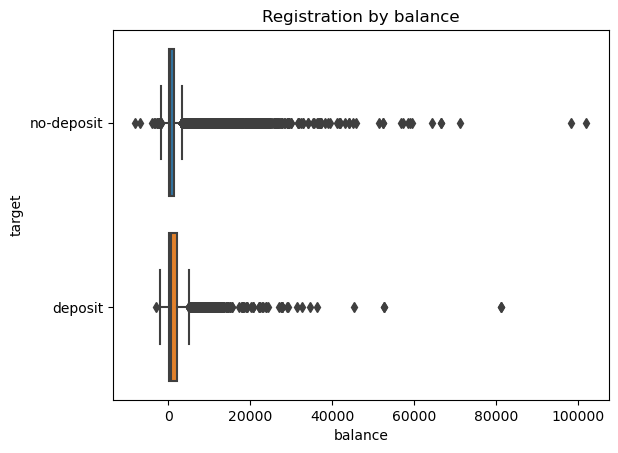

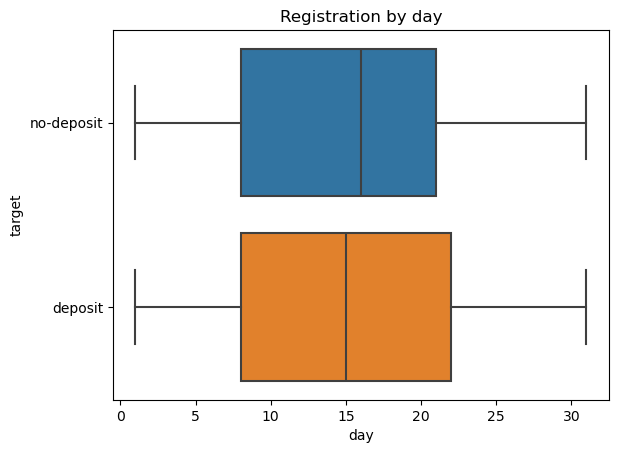

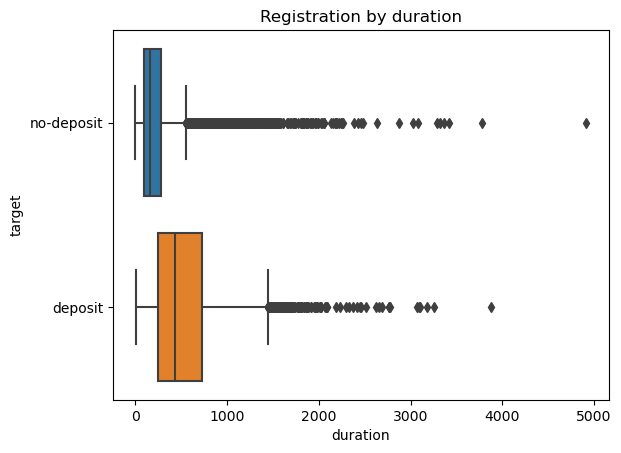

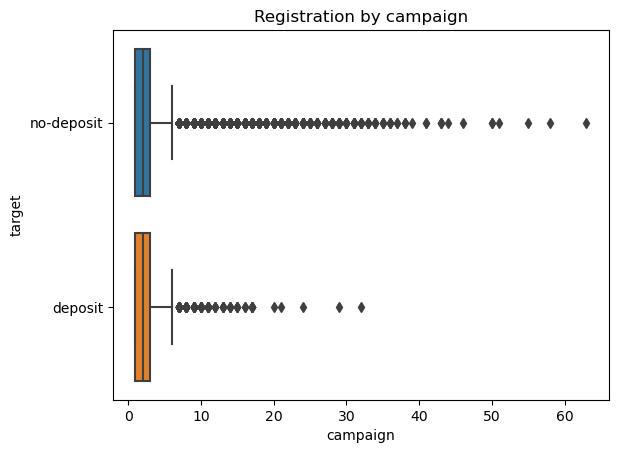

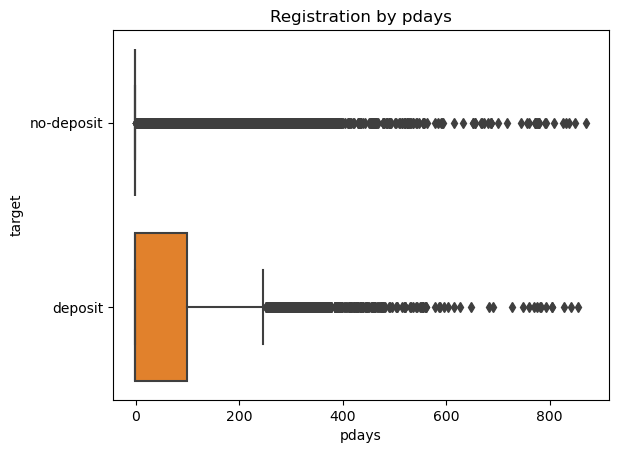

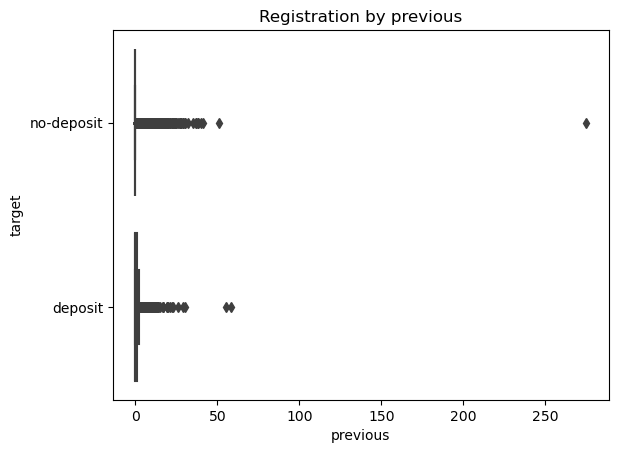

In [839]:
# Setting the target column to string type so seaborn treats it as a category
data['target'] = data['target'].astype('str')

for col in num_cols:
    sns.boxplot(x=col, y='target', data=data)
    plt.title(f'Registration by {col}')
    plt.show()

#### Key Points:
 Age seems to influence registration rates. Generally, older individuals are more likely to register, but a significant number of younger people also tend to sign up. We've previously noted a connection between 'Students' and 'Retirees' as well.

The last conversation duration was longer for customers who were targeted compared to those who were not

In [841]:
data['target']

0        no-deposit
1        no-deposit
2        no-deposit
3        no-deposit
4        no-deposit
            ...    
45206       deposit
45207       deposit
45208       deposit
45209    no-deposit
45210    no-deposit
Name: target, Length: 45211, dtype: object

In [842]:
data['target'].value_counts()

target
no-deposit    39922
deposit        5289
Name: count, dtype: int64

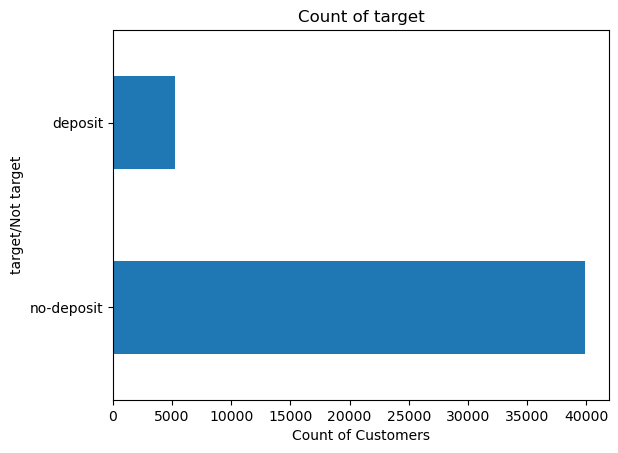

In [843]:
# Plot the distinct values 
data['target'].value_counts().plot(kind='barh')
plt.title('Count of target')
plt.xlabel('Count of Customers')
plt.ylabel('target/Not target')
plt.show()

In [844]:
# Checking the percentage 
data['target'].value_counts()/data.shape[0]

target
no-deposit    0.883015
deposit       0.116985
Name: count, dtype: float64

As shown above, we can see that our data is 'imbalanced'. Most of the customers did not register for our banking product, with a class distribution of ~60/40 split. We will convert these columns to a binary one, where 1 represents those who did register for the term deposit and 0 represents those who did not.

In [846]:
data['target'] = np.where(data['target'] == 'yes', 1, 0)

In [847]:
data['target'].value_counts()

target
0    45211
Name: count, dtype: int64

In [848]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  target     45211 non-null  int32 
 17  target_    45211 non-null  int32 
dtypes: int32(2), int64(7), object(9)
memory usage: 5.9+ MB


### convert binary columns first:

In [850]:
# Check the distinct values
data['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Looking at the data above, we can see that there are some columns that have more than 2 classes (binary representation of values). We will focus on those that we can transform into binary (0, 1) first. Tranforming these values from type `object` to numeric datatypes is a pivotal step in our data preprocessing because ML models can only take in numberic data types. We are essentially representing our object values in numeric form.

In [852]:
data['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

Looking at the above, there are a lot of customers with unknown credit status but only 1 'yes'. Some proportions of these could have credit in default. We can make the argument that these are different things from a data standpoint (in terms of what the bank knows about the customer). Therefore, we will consider credit not in default as zero and all others as 1. 

In [854]:
# Because we multiple values, we will use .map function
data['default'].map({'no': 0, 
                             'yes': 1 })

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: default, Length: 45211, dtype: int64

In [855]:
# Because we multiple values, we will use .map function
data['knowndefault'] = data['default'].map({'no': 0, 
                                                             'yes': 1})

In [856]:
data['knowndefault'].value_counts()

knowndefault
0    44396
1      815
Name: count, dtype: int64

In [857]:
data.drop(columns='default', inplace=True)

In [858]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   balance       45211 non-null  int64 
 5   housing       45211 non-null  object
 6   loan          45211 non-null  object
 7   contact       45211 non-null  object
 8   day           45211 non-null  int64 
 9   month         45211 non-null  object
 10  duration      45211 non-null  int64 
 11  campaign      45211 non-null  int64 
 12  pdays         45211 non-null  int64 
 13  previous      45211 non-null  int64 
 14  poutcome      45211 non-null  object
 15  target        45211 non-null  int32 
 16  target_       45211 non-null  int32 
 17  knowndefault  45211 non-null  int64 
dtypes: int32(2), int64(8), object(8)
memory usage:

In [859]:
data['loan'].value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

In [860]:
data['housing'].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

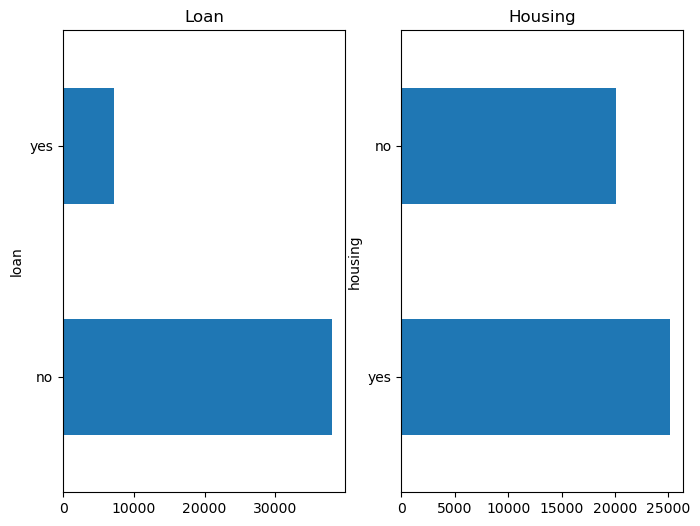

In [861]:
plt.subplots(1, 2, figsize=(8, 6))
plt.subplot(1, 2, 1)
data['loan'].value_counts().plot(kind='barh')
plt.title('Loan')
plt.subplot(1, 2, 2)
data['housing'].value_counts().plot(kind='barh')
plt.title('Housing')
plt.show()

Looking at the plots above, we can see that `loan` and `housing` have predominantly two classes, with distinct values of 'yes' and 'no'. 

In [863]:
data['knownloan'] = data['loan'].map({'no': 0, 
                                                      
                                                     'yes': 1})

In [864]:
data['knownloan'].value_counts()

knownloan
0    37967
1     7244
Name: count, dtype: int64

In [865]:
data['knownhousing'] = data['housing'].map({'no':0 , 
                                                    
                                                   'yes': 1})

In [866]:
data['knownhousing'].value_counts()

knownhousing
1    25130
0    20081
Name: count, dtype: int64

 going to drop the original column of `housing` and `loan`

In [868]:
data.drop(columns=['housing', 'loan'], inplace=True)

In [869]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   balance       45211 non-null  int64 
 5   contact       45211 non-null  object
 6   day           45211 non-null  int64 
 7   month         45211 non-null  object
 8   duration      45211 non-null  int64 
 9   campaign      45211 non-null  int64 
 10  pdays         45211 non-null  int64 
 11  previous      45211 non-null  int64 
 12  poutcome      45211 non-null  object
 13  target        45211 non-null  int32 
 14  target_       45211 non-null  int32 
 15  knowndefault  45211 non-null  int64 
 16  knownloan     45211 non-null  int64 
 17  knownhousing  45211 non-null  int64 
dtypes: int32(2), int64(10), object(6)
memory usage

In [870]:
data['contact'].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

Based on the distinct values, we know for certain the customers that were contacted through celluar through the 'cellular' class.

In [872]:
data['contactcellular'] = np.where(data['contact'] == 'cellular', 1, 0)

In [873]:
data.drop(columns='contact', inplace=True)

In [874]:
data['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [875]:
data['poutcome'] = data['poutcome'].map({
    'success': 'success',
    'failure': 'failure',
    'other': 'other',
    'unknown': 'other'
})

In [876]:
data['poutcome'].value_counts()

poutcome
other      38799
failure     4901
success     1511
Name: count, dtype: int64

In [877]:
data['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

What about the date part columns that are present in the data? These are the day and month of the year when the customer was contacted. We make the argument that there may be a relationship between time in the week and also a seasonal pattern to how our customers sign up for the term deposit (this is a hypothesis). Therefore, we will choose to encode these as increasing integers for our model. 

In [879]:
data.head(1)

,age,job,marital,education,balance,day,month,duration,campaign,pdays,previous,poutcome,target,target_,knowndefault,knownloan,knownhousing,contactcellular
0,58,management,married,tertiary,2143,5,may,261,1,-1,0,other,0,0,0,0,1,0


In [880]:
data['day'].value_counts()

day
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: count, dtype: int64

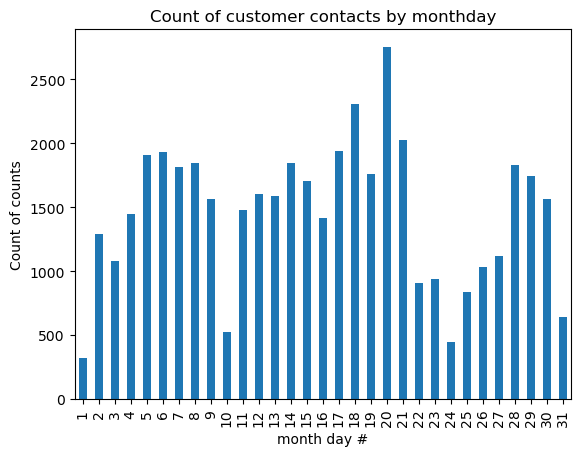

In [881]:
data['day'].value_counts().sort_index().plot(kind='bar')
plt.title('Count of customer contacts by monthday')
plt.xlabel('month day #')
plt.ylabel('Count of counts')
plt.show()

 appears to have the most contact on 20th month.

In [883]:
data['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [884]:
data['quarter'] = pd.to_datetime(data['month'], format='%b').dt.quarter

In [885]:
data['quarter'].value_counts()

quarter
2    22039
3    13721
4     4922
1     4529
Name: count, dtype: int64

For months, we are going to encode the results based on 'good months' and 'bad months'. The good month shows a higher percent of people that sign up. 

In [887]:
good_months  = ['apr', 'oct', 'mar', 'sep', 'dec']
data['good_month'] = 0
data.loc[data['month'].isin(good_months), 'good_month'] = 1

<Axes: xlabel='good_month'>

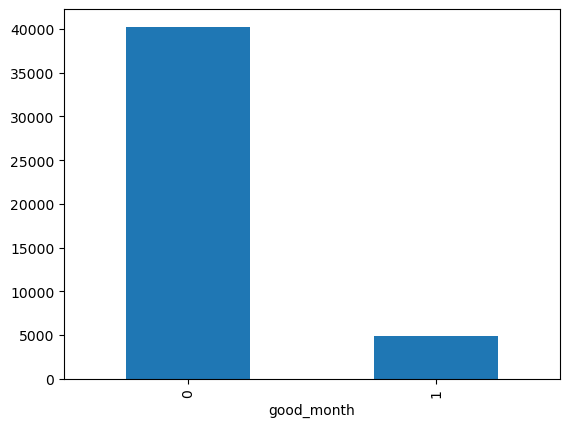

In [888]:
data.good_month.value_counts().plot(kind='bar')

Now we have rolled the last contact month to the quarter and encoded these as integers. We choose to drop `month` after this

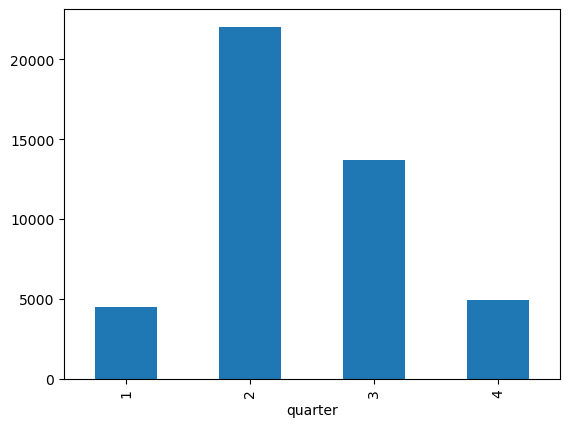

In [890]:
data['quarter'].value_counts().sort_index().plot(kind='bar')
plt.show()

Interestingly, we do not have a lot of data points in quarter one, most customers were contacted during quarter two and this the contact declines steeply through the other quarters.

In [975]:
data.drop(columns='month', inplace=True)

KeyError: "['month'] not found in axis"

In [893]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45211 non-null  int64 
 1   job              45211 non-null  object
 2   marital          45211 non-null  object
 3   education        45211 non-null  object
 4   balance          45211 non-null  int64 
 5   day              45211 non-null  int64 
 6   duration         45211 non-null  int64 
 7   campaign         45211 non-null  int64 
 8   pdays            45211 non-null  int64 
 9   previous         45211 non-null  int64 
 10  poutcome         45211 non-null  object
 11  target           45211 non-null  int32 
 12  target_          45211 non-null  int32 
 13  knowndefault     45211 non-null  int64 
 14  knownloan        45211 non-null  int64 
 15  knownhousing     45211 non-null  int64 
 16  contactcellular  45211 non-null  int32 
 17  quarter          45211 non-null

#### Dummy Variables

To numerically represent categorical variables with many nominal distinct values we can use ***dummy variables***. A dummy variable is a binary variable that takes values of 0 and 1, where the values indicate the presence or absence of something. A categorical variable that has more than two categories can be represented by a set of dummy variables, with one variable being used to indicate the presense/absence for each category. 

Dummy variables are also known as ***One-hot encoding*** since only one of the dummy variables for each category can have a value of 1 at a time. 